In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [17]:
desired_output = df["y"]
df_dummies = pd.get_dummies(df)
del df_dummies["duration"]
del df_dummies["y_no"]

In [18]:
df_dummies = df_dummies.dropna()
df_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


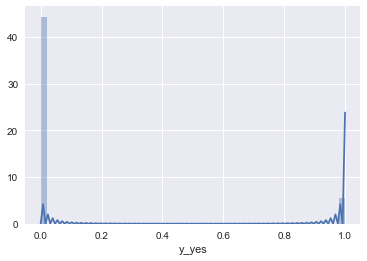

In [19]:
y_df_dummies = df_dummies["y_yes"].copy()
y_df_dummies["id"]=range(1,len(df_dummies)+1)
sns_plot = sns.distplot(df_dummies["y_yes"])

In [20]:
outcomes_of_interest = ["y_yes"]
n_bins = 20
X_df_dummies = df_dummies.copy()
del X_df_dummies["y_yes"]
Y_df_dummies = df_dummies[outcomes_of_interest].copy()
Y_df_dummies[outcomes_of_interest] = Y_df_dummies[outcomes_of_interest].apply(LabelEncoder().fit_transform)

In [10]:
X = X_df_dummies.values
Y = Y_df_dummies.values.T[0]
clf = ExtraTreesClassifier(n_estimators = 10,max_depth = 1)
dummy_clf = DummyClassifier()

In [21]:
scores = cross_val_score(clf, X, Y, cv=10,scoring = make_scorer(acc))
dummy_scores = cross_val_score(dummy_clf, X, Y, cv=10, scoring = make_scorer(acc))
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f (+/- %0.2f)" % (dummy_scores.mean(), dummy_scores.std()))

ACC: 0.89 (+/- 0.00)
Dummy ACC: 0.80 (+/- 0.00)


[ 7 61 49  4 17 33 42  0 53 13 24 23 22 21 20 19 18 57 16 15 14 12 52 11 10
  9  8 58  6  5 59  3  2  1 25 26 27 28 51 50 54 48 47 46 45 44 43 55 41 40
 39 38 37 36 35 34 56 32 31 60 29 30]
Feature ranking:
1. euribor3m (0.300000)
2. poutcome_success (0.100000)
3. month_mar (0.100000)
4. emp.var.rate (0.100000)
5. job_student (0.100000)
6. default_no (0.100000)
7. contact_cellular (0.100000)
8. age (0.100000)
9. month_sep (0.000000)
10. job_management (0.000000)
11. marital_unknown (0.000000)
12. marital_single (0.000000)
13. marital_married (0.000000)
14. marital_divorced (0.000000)
15. job_unknown (0.000000)
16. job_unemployed (0.000000)
17. job_technician (0.000000)
18. day_of_week_tue (0.000000)
19. job_services (0.000000)
20. job_self-employed (0.000000)
21. job_retired (0.000000)
22. job_housemaid (0.000000)
23. month_oct (0.000000)
24. job_entrepreneur (0.000000)
25. job_blue-collar (0.000000)
26. job_admin. (0.000000)
27. nr.employed (0.000000)
28. day_of_week_wed (0.000000)
29

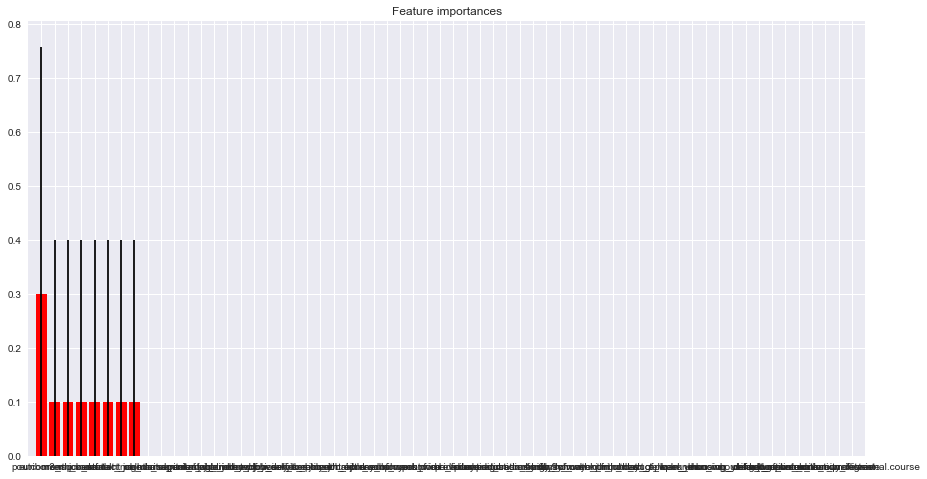

In [12]:
clf.fit(X,Y)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, df_dummies.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(df_dummies.columns)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

Normalized confusion matrix


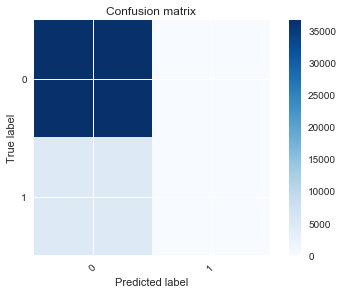

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(Y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(Y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')